### Import the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import math
import json
import time
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Load the data and give appropriate column names.

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/ratings_Electronics.csv",names=['UserID','ProductID','Ratings','TIme'])

In [3]:
data.head(10)

,UserID,ProductID,Ratings,TIme
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


# EDA.

### The 'Time' column is not required so we drop it.

In [4]:
data=data.drop("TIme",axis=1)

In [5]:
data.head(10)

,UserID,ProductID,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


### The data contains 3 columns and 7824482 rows.

### Attribute datatypes.

In [6]:
data.dtypes

UserID        object
ProductID     object
Ratings      float64
dtype: object

### Missing values  .

In [7]:
print('Number of missing values across columns-\n', data.isnull().sum())

Number of missing values across columns-
 UserID       0
ProductID    0
Ratings      0
dtype: int64


### No attribute has any missing values present .

### The five number summary of the data.

In [8]:
data['Ratings'].describe().transpose()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Ratings, dtype: float64

In [11]:
print('The minimum Ratings is: %d' %(data['Ratings'].min()))
print('The maximum Ratings is: %d' %(data['Ratings'].max()))

The minimum Ratings is: 1
The maximum Ratings is: 5


### The ratings range  : 1-5. 
### Minimum rating = 1 and Maximum rating = 5.

### Checking the distribution among the 'Ratings' column.

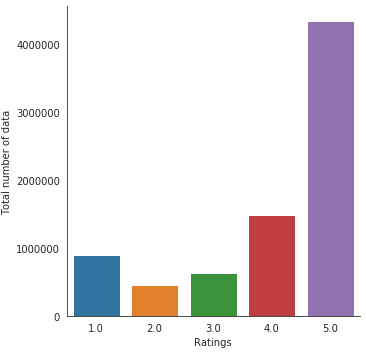

In [13]:
with sns.axes_style('white'):
    r = sns.factorplot("Ratings", data=data, aspect=1.0,kind='count')
    r.set_ylabels("Total number of data")

### Rating 5 is the most rated and Rating 2 is the least rated..

### Count of unique users and unique items.

In [14]:
print('Number of unique users in data = ', data['UserID'].nunique())
print('Number of unique items in data = ', data['ProductID'].nunique())

Number of unique users in data =  4201696
Number of unique items in data =  476002


### The data we have is too huge so we remove sparse data from the dataset.

### The users who have rated the most (First 50 users in the most rated users list).

In [15]:
most_rated = data.groupby('UserID').size().sort_values(ascending=False)[:50]
most_rated

UserID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
A1T1YSCDW0PD25    227
A3CW0ZLUO5X2B1    227
A2UOHALGF2X77Q    227
A250AXLRBVYKB4    226
A4WEZJOIZIV4U     225
A1CMD08Z49PGKQ    221
A1VQHH85U7PX0     220
AOEAD7DPLZE53     218
A1J75JJ0Q2OEJN    218
A11KZ906QD08C5    216
A20DZX38KRBIT8    213
A1F9Z42CFF9IAY    213
AVPNQUVZWMDSX     212
A3OA4DV4L81N1D    209
A1EVV74UQYVKRY    208
AT6

### The users who have rated 200 or more times.

In [16]:
counts = data['UserID'].value_counts()
data_final = data[data['UserID'].isin(counts[counts >=200].index)]

In [17]:
data_final.shape

(13862, 3)

In [18]:
print('Number of users who have rated  more than 200 times =', len(data_final))
print('Number of unique USERS in final data = ', data_final['UserID'].nunique())
print('Number of unique ITEMS in final data = ', data_final['ProductID'].nunique())

Number of users who have rated  more than 200 times = 13862
Number of unique USERS in final data =  52
Number of unique ITEMS in final data =  9673


### 'data_final' have only those users who have rated more than 200 times..

### Density of the matrix .

In [19]:
final_data_matrix = data_final.pivot(index = 'UserID', columns ='ProductID', values = 'Ratings').fillna(0)
print('Shape of final_data_matrix: ', final_data_matrix.shape)

given_num_of_data = np.count_nonzero(final_data_matrix)
print('given_num_of_data = ', given_num_of_data)
possible_num_of_data = final_data_matrix.shape[0] * final_data_matrix.shape[1]
print('possible_num_of_data = ', possible_num_of_data)
density = (given_num_of_data/possible_num_of_data)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_data_matrix:  (52, 9673)
given_num_of_data =  13862
possible_num_of_data =  502996
density: 2.76%


In [20]:
final_data_matrix.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
UserID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SPLITTING OF THE DATASET.

### Dividing data into train and test sets with 70% and 30% respectively.

In [21]:
train_set, test_set = train_test_split(data_final, test_size = 0.3, random_state=0)
train_set.head(10)

,UserID,ProductID,Ratings
4089445,A1EVV74UQYVKRY,B004G6002M,5.0
7403352,A12DQZKRKTNF5E,B00DJNCS6O,4.0
4795978,AVPNQUVZWMDSX,B005B3VO24,5.0
2075888,ARBKYIVNYWK3C,B001IAYUM0,5.0
3327479,A1VQHH85U7PX0,B003EYV224,4.0
6472285,A23GFTVIETX7DS,B00946XHI8,4.0
3326016,A3LGT6UZL99IW1,B003EWKG3M,2.0
791257,A3CG93783LP0FO,B000BZ1P3A,1.0
1294136,A11KZ906QD08C5,B000PTFDYO,4.0
7800071,A1EXGL6L0QQ0M5,B00IT1WJZQ,5.0


##  POPULARITY BASED RECOMMENDER MODEL.

In [22]:
train_set_grouped = train_set.groupby('ProductID').agg({'UserID': 'count'}).reset_index()
train_set_grouped.rename(columns = {'UserID': 'score'},inplace=True)
train_set_grouped.head()

,ProductID,score
0,1400532655,1
1,1400699169,1
2,9043413585,1
3,9800359788,1
4,9981719005,1


### Extracting the top 5 popular products.

In [23]:
train_set_sort = train_set_grouped.sort_values(['Score', 'ProductID'], ascending = [0,1]) 
       
train_set_sort['Rank'] = train_set_sort['Score'].rank(ascending=0, method='first') 

popularity_recommendations = train_set_sort.head(5) 
popularity_recommendations 

KeyError: 'Score'

### Making predictions.

In [ ]:
def recommend(UserID):     
    user_recommendations = popularity_recommendations 
  
    user_recommendations['UserID'] = UserID 
 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

### Recommending products to users.

In [ ]:
find_recom = [15,121,53]  
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

### We can see that the recommendations for all the users remain the same.
### The recommendations are based on popularity.
### They are not personalised to a specific user.

##  COLLABARATIVE FILTERING RECOMMENDER MODEL.

In [26]:
data_CF = pd.concat([train_set, test_set]).reset_index()
data_CF.head()

,index,UserID,ProductID,Ratings
0,4089445,A1EVV74UQYVKRY,B004G6002M,5.0
1,7403352,A12DQZKRKTNF5E,B00DJNCS6O,4.0
2,4795978,AVPNQUVZWMDSX,B005B3VO24,5.0
3,2075888,ARBKYIVNYWK3C,B001IAYUM0,5.0
4,3327479,A1VQHH85U7PX0,B003EYV224,4.0


### User based collaborative filtering recommender model.

In [27]:
pivot_data = data_CF.pivot(index = 'UserID', columns ='ProductID', values = 'Ratings').fillna(0)
pivot_data.shape
pivot_data.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
UserID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
pivot_data['USER_INDEX'] = np.arange(0, pivot_data.shape[0], 1)
pivot_data.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8,USER_INDEX
UserID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### Actual ratings provided by the users.

In [29]:
pivot_data.set_index(['USER_INDEX'], inplace=True)
pivot_data.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
USER_INDEX,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Implementing SVD.

In [30]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_data, k = 10)
sigma = np.diag(sigma)

### Predicted ratings.

In [31]:
all_user_predicted_data = np.dot(np.dot(U, sigma), Vt) 
preds_data = pd.DataFrame(all_user_predicted_data, columns = pivot_data.columns)
preds_data.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
0,-0.012000,0.114113,0.071882,0.205474,0.121252,0.020205,0.021973,0.070338,0.223924,0.069226,...,0.151689,0.314467,0.190984,0.007439,0.822226,0.100757,0.120019,0.103454,0.109109,0.018149
1,-0.001117,0.067839,0.044157,0.087031,-0.011565,0.012597,0.075473,0.037046,0.136408,0.043112,...,0.022013,0.005458,-0.003732,-0.056899,0.285667,0.056479,0.016093,-0.044025,-0.092054,-0.052397
2,-0.003182,0.037187,0.026930,0.169114,0.085230,0.007734,-0.022277,0.065654,0.079180,0.062734,...,0.757488,0.650691,0.590773,0.110989,1.032712,0.039722,0.164303,0.242431,0.355735,0.229561
3,-0.004415,0.056826,0.033211,0.079297,0.150307,0.009338,0.163850,0.035837,0.085494,0.031686,...,0.207394,0.033930,0.085801,-0.055344,0.628556,0.051591,-0.009771,-0.063160,-0.104409,-0.022564
4,-0.013488,0.182096,0.098180,0.089350,-0.073983,0.029672,-0.195888,0.112769,0.370699,0.142921,...,0.353159,0.350281,0.300631,-0.058374,0.802472,0.132512,0.134518,0.049240,-0.073907,-0.041970


### Recommending products based on predictions.

In [33]:
def recommend_items(userID, pivot_data, preds_data, num_recommendations):
      
    UserIDx = userID-1 # index starts at 0
    
    # Get and sort the user's data
    sorted_user_data = pivot_data.iloc[UserIDx].sort_values(ascending=False)
    #sorted_user_data
    sorted_user_predictions = preds_data.iloc[UserIDx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_data, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_data', 'user_predictions']
    
    temp = temp.loc[temp.user_data == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(UserID = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

### Recommending products to the user with UserID 32.

In [34]:
userID = 32
k = 5
recommend_items(userID, pivot_data, preds_data, k)


Below are the recommended items for user(UserID = 32):

                   user_data  user_predictions
Recommended Items                             
B003XN24GY               0.0          3.200128
B00JF0D7RE               0.0          2.843675
B00JWV1LP6               0.0          2.713293
B00ETH7ERM               0.0          2.658583
B004JHVJ5A               0.0          2.528490


## EVALUATING THE MODEL.

### Actual ratings provided by the user.

In [35]:
final_data_matrix.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
UserID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Average actual Ratings for each product .

In [36]:
final_data_matrix.mean().head()

ProductID
1400532655    0.019231
1400699169    0.096154
9043413585    0.057692
9800359788    0.096154
9981719005    0.057692
dtype: float64

### Predicted ratings.

In [37]:
preds_data.head()

ProductID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
0,-0.012000,0.114113,0.071882,0.205474,0.121252,0.020205,0.021973,0.070338,0.223924,0.069226,...,0.151689,0.314467,0.190984,0.007439,0.822226,0.100757,0.120019,0.103454,0.109109,0.018149
1,-0.001117,0.067839,0.044157,0.087031,-0.011565,0.012597,0.075473,0.037046,0.136408,0.043112,...,0.022013,0.005458,-0.003732,-0.056899,0.285667,0.056479,0.016093,-0.044025,-0.092054,-0.052397
2,-0.003182,0.037187,0.026930,0.169114,0.085230,0.007734,-0.022277,0.065654,0.079180,0.062734,...,0.757488,0.650691,0.590773,0.110989,1.032712,0.039722,0.164303,0.242431,0.355735,0.229561
3,-0.004415,0.056826,0.033211,0.079297,0.150307,0.009338,0.163850,0.035837,0.085494,0.031686,...,0.207394,0.033930,0.085801,-0.055344,0.628556,0.051591,-0.009771,-0.063160,-0.104409,-0.022564
4,-0.013488,0.182096,0.098180,0.089350,-0.073983,0.029672,-0.195888,0.112769,0.370699,0.142921,...,0.353159,0.350281,0.300631,-0.058374,0.802472,0.132512,0.134518,0.049240,-0.073907,-0.041970


### Average predicted ratings for each product .

In [38]:
preds_data.mean().head()

ProductID
1400532655    0.021808
1400699169    0.069867
9043413585    0.041554
9800359788    0.123189
9981719005    0.068208
dtype: float64

###  RMSE for evaluation.

In [39]:
rmse_data = pd.concat([final_data_matrix.mean(), preds_data.mean()], axis=1)
rmse_data.columns = ['Avg_actual_data', 'Avg_predicted_data']
print(rmse_data.shape)
rmse_data['Product_index'] = np.arange(0, rmse_data.shape[0], 1)
rmse_data.head()

(9673, 2)


,Avg_actual_data,Avg_predicted_data,Product_index
ProductID,,,
1400532655,0.019231,0.021808,0
1400699169,0.096154,0.069867,1
9043413585,0.057692,0.041554,2
9800359788,0.096154,0.123189,3
9981719005,0.057692,0.068208,4


In [40]:
RMSE = round((((rmse_data.Avg_actual_data - rmse_data.Avg_predicted_data) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.03662 



### As the error percentage is less we can say pur models performance is good.

### Recommending top 5 products to the user with UserID 23.

In [41]:
userID = 23
k = 5
recommend_items(userID, pivot_data, preds_data, k)


Below are the recommended items for user(UserID = 23):

                   user_data  user_predictions
Recommended Items                             
B00D50UNRM               0.0          0.945863
B00G4UQ6U8               0.0          0.879811
B00BN2AJOQ               0.0          0.866232
B001UI2FPE               0.0          0.858159
B00GLG2D4I               0.0          0.835047


In [42]:
### Recommending top 5 products to the user with UserID 46

In [43]:
userID =46
k= 5
recommend_items(userID, pivot_data, preds_data, k)


Below are the recommended items for user(UserID = 46):

                   user_data  user_predictions
Recommended Items                             
B003ES5ZUU               0.0          2.282213
B00D5Q75RC               0.0          2.147326
B009SYZ8OC               0.0          1.979879
B00829TIEK               0.0          1.941871
B00E3W15P0               0.0          1.920502


### Here we can clearly see that the products recommended to user 23 is different than the products recommended to user 46.

## SUMMARIZING INSIGHTS.

### We see here that :
### Collabarative filtering based recommender model recommends different products to different users .
### Popularity based recommender model recommends all the users the same products based on the popularity of the products.
### Hence we can conclude that collaborative filtering is better than popularity based recommendations because collaborative filtering model is personalised according to the users interset where as popularity based model is a gives very generalised recommendations.
